In [1]:
#attempt to improve the NN
#add the local and the global view construct coz transit false positive mismatch seems to be a major problem
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#network and training parameters:
BATCH_SIZE = 128
VERBOSE = 1 #no idea what this is but lets see...
VAL_SPLIT = 0.2  #how much of sample is reserved for validation

In [3]:
Xtrain=np.loadtxt('Xtrain.csv',delimiter=',')
Ytrain=np.loadtxt('Ytrain.csv',delimiter=',')
Xtest=np.loadtxt('Xtest.csv',delimiter=',')
Ytest=np.loadtxt('Ytest.csv',delimiter=',')
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)

(5700, 2000) (5700, 3) (600, 2000) (600, 3)


In [32]:
#got the training set ... now write the neural net
#buid the model
#SGD stochastic gradient descent... 
model = tf.keras.models.Sequential()
DROPOUT=0.3
IP=5700
TEST=600
np.random.seed(11223)

arr=np.arange(0,IP,1)
np.random.shuffle(arr)
Xtrain=[Xtrain[i] for i in arr]
Ytrain=[Ytrain[i] for i in arr]

arr=np.arange(0,TEST,1)
np.random.shuffle(arr)
Xtest=[Xtest[i] for i in arr]
Ytest=[Ytest[i] for i in arr]

#Xtrain_new=np.array(Xtrain).reshape(5700,500,4)
#print(Xtrain_new.shape)

#add hidden layers
model.add(keras.layers.Reshape((2000, 1), input_shape=(2000,)))
model.add(keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='relu'))
model.add(keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='relu'))
model.add(keras.layers.MaxPool1D(3,strides=3,data_format='channels_last'))
model.add(keras.layers.Conv1D(32,kernel_size=5,strides=2,activation='relu'))
model.add(keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu'))
model.add(keras.layers.MaxPool1D(3,strides=3,data_format='channels_last'))
model.add(keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu'))
model.add(keras.layers.MaxPool1D(3,strides=3,data_format='channels_last'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16,name='dense_layer_3',activation='relu'))
model.add(keras.layers.Dense(3,name='dense_layer_4',activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_12 (Reshape)         (None, 2000, 1)           0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 998, 16)           96        
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 497, 16)           1296      
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 165, 16)           0         
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 81, 32)            2592      
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 77, 32)            5152      
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 25, 32)          

In [33]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(np.array(Xtrain),np.array(Ytrain), batch_size=64, epochs=100, verbose=VERBOSE, validation_split=VAL_SPLIT, callbacks=[es_callback])

Epoch 1/100
72/72 [==============================] - 5s 55ms/step - loss: 1.0760 - accuracy: 0.3700 - val_loss: 1.0638 - val_accuracy: 0.3158
Epoch 2/100
72/72 [==============================] - 4s 50ms/step - loss: 1.0525 - accuracy: 0.4129 - val_loss: 1.0389 - val_accuracy: 0.4272
Epoch 3/100
72/72 [==============================] - 4s 52ms/step - loss: 1.0332 - accuracy: 0.4564 - val_loss: 0.9991 - val_accuracy: 0.6228
Epoch 4/100
72/72 [==============================] - 4s 52ms/step - loss: 0.9318 - accuracy: 0.5956 - val_loss: 0.7662 - val_accuracy: 0.6509
Epoch 5/100
72/72 [==============================] - 4s 57ms/step - loss: 0.8196 - accuracy: 0.5849 - val_loss: 0.8185 - val_accuracy: 0.6728
Epoch 6/100
72/72 [==============================] - 4s 54ms/step - loss: 0.8072 - accuracy: 0.6476 - val_loss: 0.7533 - val_accuracy: 0.7114
Epoch 7/100
72/72 [==============================] - 4s 54ms/step - loss: 0.7428 - accuracy: 0.6739 - val_loss: 0.6709 - val_accuracy: 0.7184
Epoch 

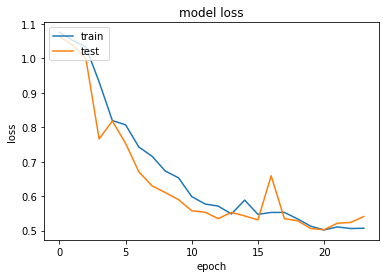

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

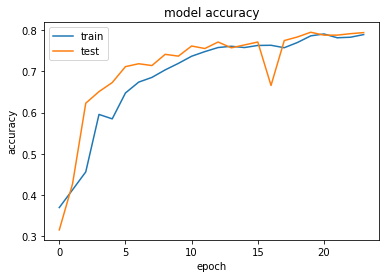

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
test_loss, test_acc = model.evaluate(np.array(Xtest), np.array(Ytest))
print('Test accuracy:', test_acc)
Ypred_raw=model.predict(np.array(Xtrain))
Ypred=np.argmax(Ypred_raw, axis=1)
Ytest_new=np.argmax(Ytrain,axis=1)
cm = confusion_matrix(Ytest_new, Ypred)
print(cm)

19/19 [==============================] - 0s 8ms/step - loss: 0.5132 - accuracy: 0.7683
Test accuracy: 0.7683333158493042
[[1682  194   24]
 [ 610 1069  221]
 [   4  108 1788]]
